In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
df = pd.read_csv('credit_card_dataset.csv')
df.shape

(10108, 18)

In [51]:
df.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1


In [52]:
df.drop(['Activation_30_Days','Client_Num'], axis=1,inplace=True)
df.columns

Index(['Card_Category', 'Annual_Fees', 'Customer_Acq_Cost', 'Week_Start_Date',
       'Week_Num', 'Qtr', 'current_year', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Vol',
       'Avg_Utilization_Ratio', 'Use Chip', 'Exp Type', 'Interest_Earned',
       'Delinquent_Acc'],
      dtype='object')

In [126]:
round(dfcopy.describe(),2)

,Annual_Fees,Customer_Acq_Cost,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Interest_Earned,Delinquent_Acc
count,10108.00,10108.00,10108.00,10108.00,10108.00,10108.00,10108.00,10108.00,10108.00
mean,291.85,96.25,8635.64,1162.79,4404.63,64.86,0.27,775.96,0.06
std,118.34,25.77,9093.14,815.16,3397.91,23.48,0.28,723.95,0.24
min,95.00,40.00,1438.30,0.00,510.00,10.00,0.00,42.14,0.00
25%,195.00,79.00,2552.75,355.50,2155.75,45.00,0.02,326.15,0.00
50%,295.00,95.00,4549.00,1276.50,3899.50,67.00,0.18,559.98,0.00
75%,395.00,112.00,11070.25,1784.00,4741.00,81.00,0.50,962.68,0.00
max,500.00,172.00,34516.00,2517.00,18484.00,139.00,1.00,4785.00,1.00


In [53]:
def uni(x):
    return df[x].unique()

columns = ['current_year','Qtr','Exp Type','Card_Category','Use Chip','Week_Num']

for col in columns:
    print(f"{col} :", uni(col))

current_year : [2023]
Qtr : ['Q1' 'Q2' 'Q3' 'Q4']
Exp Type : ['Travel' 'Entertainment' 'Bills' 'Grocery' 'Fuel' 'Food']
Card_Category : ['Blue' 'Platinum' 'Silver' 'Gold']
Use Chip : ['Chip ' 'Swipe ' 'Online ']
Week_Num : ['Week-1' 'Week-2' 'Week-3' 'Week-4' 'Week-5' 'Week-6' 'Week-7' 'Week-8'
 'Week-9' 'Week-10' 'Week-11' 'Week-12' 'Week-13' 'Week-14' 'Week-15'
 'Week-16' 'Week-17' 'Week-18' 'Week-19' 'Week-20' 'Week-21' 'Week-22'
 'Week-23' 'Week-24' 'Week-25' 'Week-26' 'Week-27' 'Week-28' 'Week-29'
 'Week-30' 'Week-31' 'Week-32' 'Week-33' 'Week-34' 'Week-35' 'Week-36'
 'Week-37' 'Week-38' 'Week-39' 'Week-40' 'Week-41' 'Week-42' 'Week-43'
 'Week-44' 'Week-45' 'Week-46' 'Week-47' 'Week-48' 'Week-49' 'Week-50'
 'Week-51' 'Week-52']


In [54]:
df.isnull().sum() / len(df) * 100

Card_Category            0.0
Annual_Fees              0.0
Customer_Acq_Cost        0.0
Week_Start_Date          0.0
Week_Num                 0.0
Qtr                      0.0
current_year             0.0
Credit_Limit             0.0
Total_Revolving_Bal      0.0
Total_Trans_Amt          0.0
Total_Trans_Vol          0.0
Avg_Utilization_Ratio    0.0
Use Chip                 0.0
Exp Type                 0.0
Interest_Earned          0.0
Delinquent_Acc           0.0
dtype: float64

In [55]:
df['Week_Start_Date'] = pd.to_datetime(df['Week_Start_Date'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Card_Category          10108 non-null  object        
 1   Annual_Fees            10108 non-null  int64         
 2   Customer_Acq_Cost      10108 non-null  int64         
 3   Week_Start_Date        10108 non-null  datetime64[ns]
 4   Week_Num               10108 non-null  object        
 5   Qtr                    10108 non-null  object        
 6   current_year           10108 non-null  int64         
 7   Credit_Limit           10108 non-null  float64       
 8   Total_Revolving_Bal    10108 non-null  int64         
 9   Total_Trans_Amt        10108 non-null  int64         
 10  Total_Trans_Vol        10108 non-null  int64         
 11  Avg_Utilization_Ratio  10108 non-null  float64       
 12  Use Chip               10108 non-null  object        
 13  E

In [ ]:
dfcopy.drop([
    'Week_Start_Date',
    'current_year',
    'Date',
    'Month',
    'Day'
], inplace=True, axis=1)

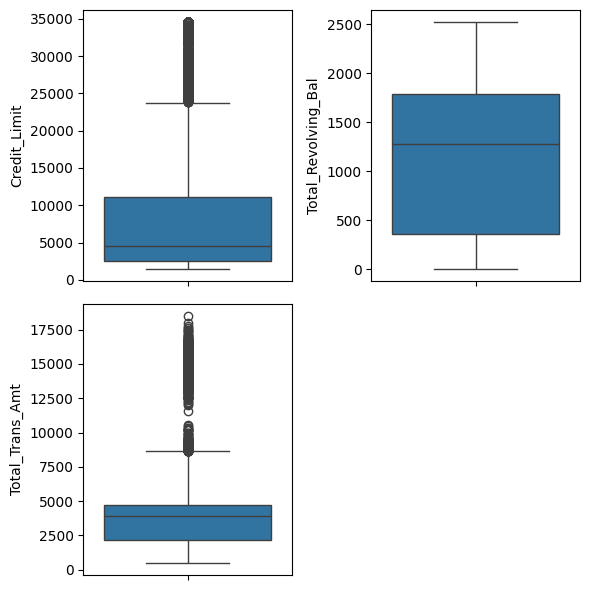

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6))  
axes = axes.flatten()

columns = [
           'Credit_Limit',
           'Total_Revolving_Bal',
           'Total_Trans_Amt']

for i, col in enumerate(columns):
    sns.boxplot(data=df,y=col, ax=axes[i]) 
    
axes[3].set_visible(False)
plt.tight_layout()
plt.show()

Extreme values (outliers) were kept because they likely reflect legitimate, unique customer segments (e.g., high spenders, premium cardholders) within the credit card data, providing valuable information

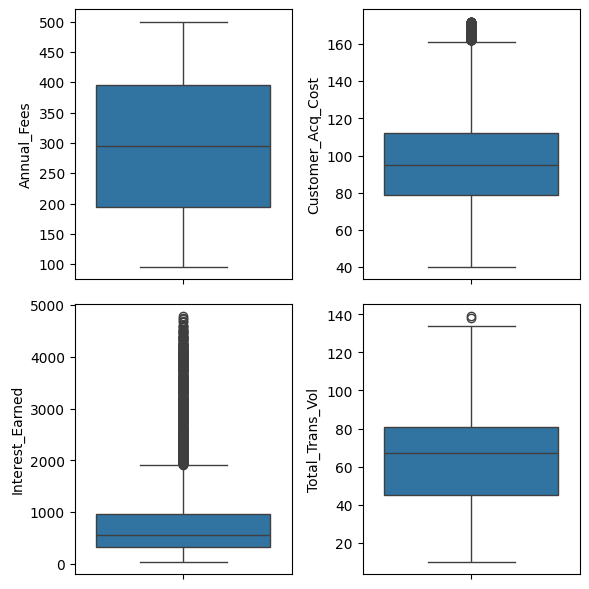

In [123]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6))  
axes = axes.flatten()

columns = ['Annual_Fees',
           'Customer_Acq_Cost',
           'Interest_Earned',
           'Total_Trans_Vol']

for i, col in enumerate(columns):
    sns.boxplot(data=df,y=col, ax=axes[i]) 
    
plt.tight_layout()
plt.show()

C:\Users\Aryan\AppData\Local\Temp\ipykernel_5004\1695842672.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=60, ha='right')  # <-- Improved readability


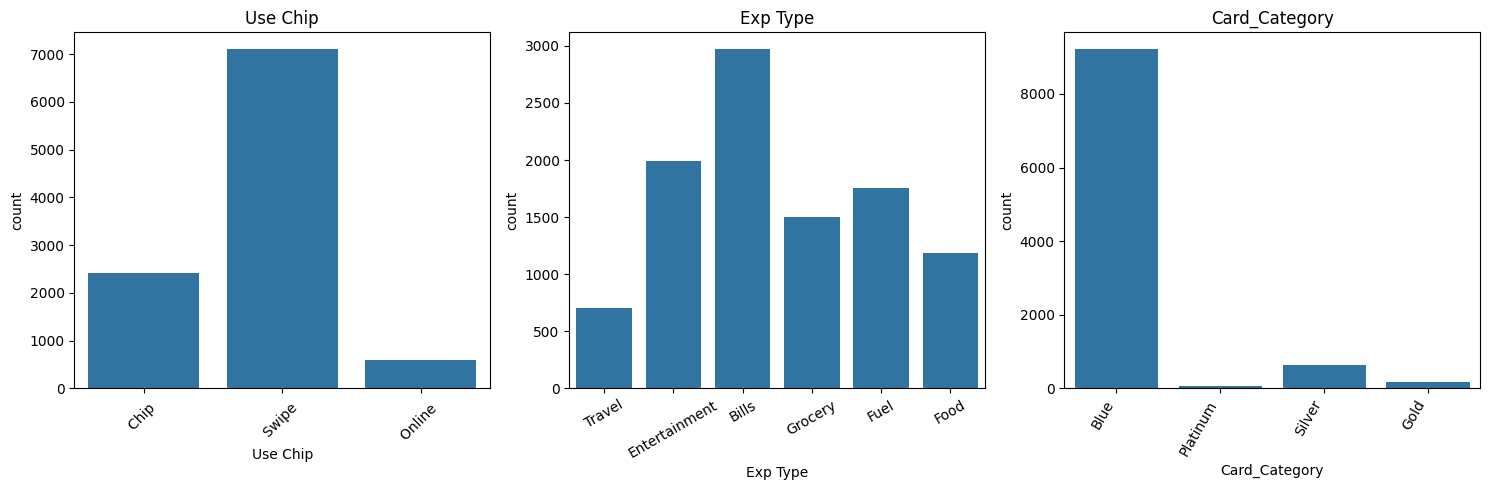

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(data=df, x='Use Chip', ax=axes[0])
axes[0].set_title('Use Chip')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='Exp Type', ax=axes[1]) 
axes[1].set_title('Exp Type')
axes[1].tick_params(axis='x', rotation=30)

sns.countplot(data=df, x='Card_Category', ax=axes[2])
axes[2].set_title('Card_Category')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=60,  ha='right') 

plt.tight_layout()
plt.show()

<Axes: xlabel='Qtr', ylabel='count'>

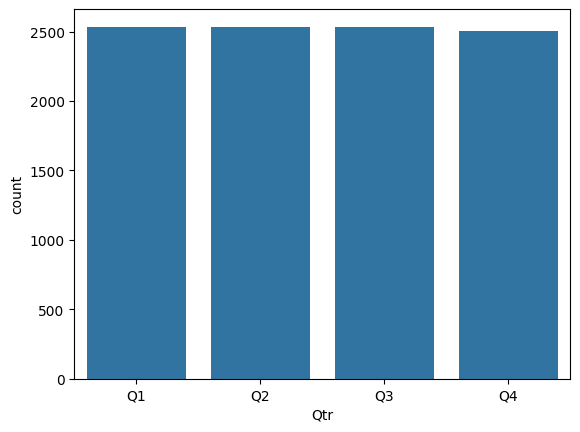

In [71]:
sns.countplot(data=df, x='Qtr')

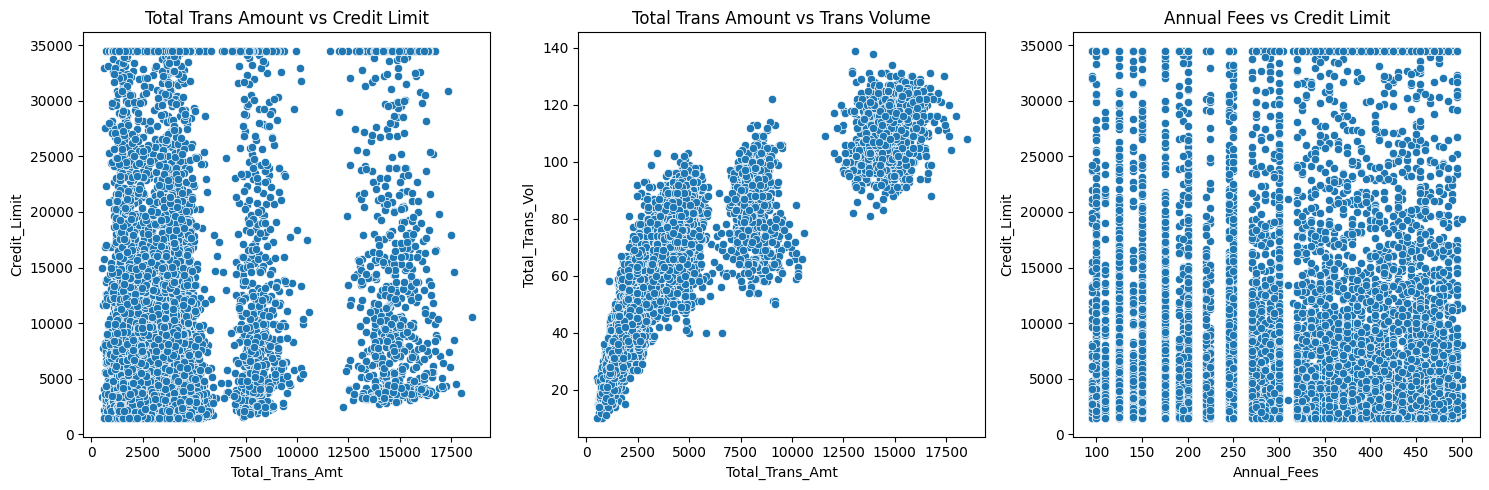

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(data=df, x='Total_Trans_Amt', y='Credit_Limit', ax=axes[0])
axes[0].set_title('Total Trans Amount vs Credit Limit')

sns.scatterplot(data=df, x='Total_Trans_Amt', y='Total_Trans_Vol', ax=axes[1])
axes[1].set_title('Total Trans Amount vs Trans Volume')

sns.scatterplot(data=df, x='Annual_Fees', y='Credit_Limit', ax=axes[2])
axes[2].set_title('Annual Fees vs Credit Limit')

plt.tight_layout()
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Week_Start_Date'])

In [74]:
df['Month'] = df['Week_Start_Date'].dt.month
df['Day'] = df['Week_Start_Date'].dt.day
df.head(5)

,Card_Category,Annual_Fees,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc,Date,Month,Day
0,Blue,200,87,2023-01-01,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0,2023-01-01,1,1
1,Blue,445,108,2023-01-01,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0,2023-01-01,1,1
2,Blue,140,106,2023-01-01,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0,2023-01-01,1,1
3,Blue,250,150,2023-01-01,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0,2023-01-01,1,1
4,Blue,320,106,2023-01-01,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1,2023-01-01,1,1


In [80]:
print(df['Month'].nunique())

12


In [81]:
month_map = {
    1: 'January', 2: 'February', 3: 'March',
    4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'
}

df['Month_Name'] = df['Month'].map(month_map)

In [96]:
df.columns

Index(['Card_Category', 'Annual_Fees', 'Customer_Acq_Cost', 'Week_Start_Date',
       'Week_Num', 'Qtr', 'current_year', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Vol',
       'Avg_Utilization_Ratio', 'Use Chip', 'Exp Type', 'Interest_Earned',
       'Delinquent_Acc', 'Date', 'Month', 'Day', 'Month_Name'],
      dtype='object')

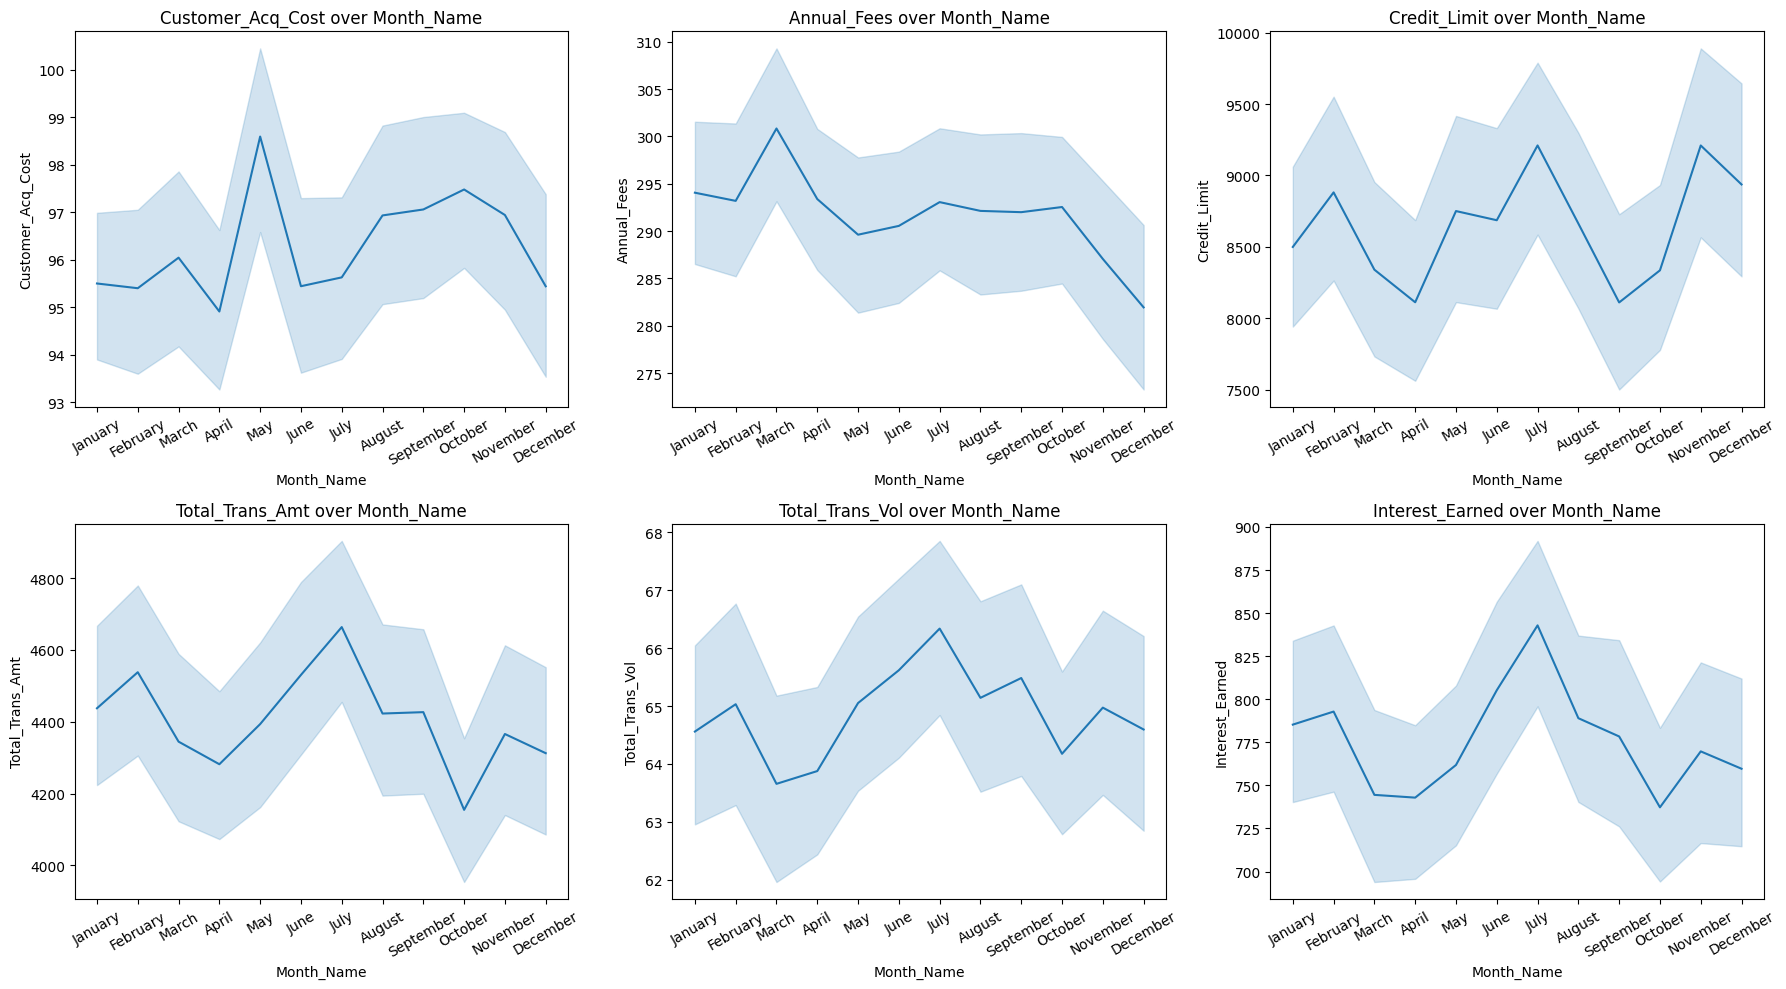

In [91]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes = axes.flatten()

column_pairs = [
    ('Month_Name','Customer_Acq_Cost'),
    ('Month_Name','Annual_Fees'),
    ('Month_Name','Credit_Limit'),
    ('Month_Name','Total_Trans_Amt'),
    ('Month_Name','Total_Trans_Vol'),
    ('Month_Name','Interest_Earned')
]

for i, (x_col, y_col) in enumerate(column_pairs):
    sns.lineplot(data=df, x=x_col, y=y_col, ax=axes[i])
    axes[i].set_title(f'{y_col} over {x_col}')
    axes[i].tick_params(axis='x', rotation=30)
    
plt.tight_layout()
plt.show()